# Keras : tf.keras (hige level API for tensorflow)를 사용하여 학습 모델 구현


1.   구글에서 제공한 Fashion MNIST dataset 분석
2.   Keras를 사용한 인공지능 학습 모델 구현 및 테스트
3.   새로운 Fashion 데이터 셋을 추가하여 학습 진행
4.   학습 결과 확인








## 파이션 라이브러리 추가 및 tensorflow 버전 확인

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.14.0


## Fashion MNIST dataset 가져오기

*   학습 데이터 : train_images
*   검증 데이터 : test_images



In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## 데이터 검증


*  label : 0 => 'T-shirt/top'
*  label : 10 => 'Ankle boot'





In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## numpy array 데이터 확인

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
train_labels[0] #  첫번째 학습용 데이터 Label

9

In [8]:
train_images[0]  #  첫번째 학습용 데이터

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

## 그림으로 첫번째 데이터 확인

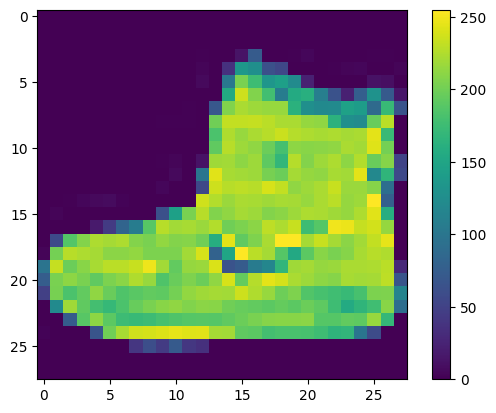

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## 계산량을 줄이기 위해 데이터 Scaling

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

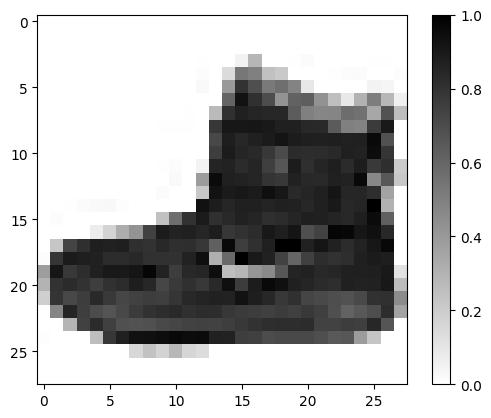

In [11]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## 25개의 학습용 이미지 그리기

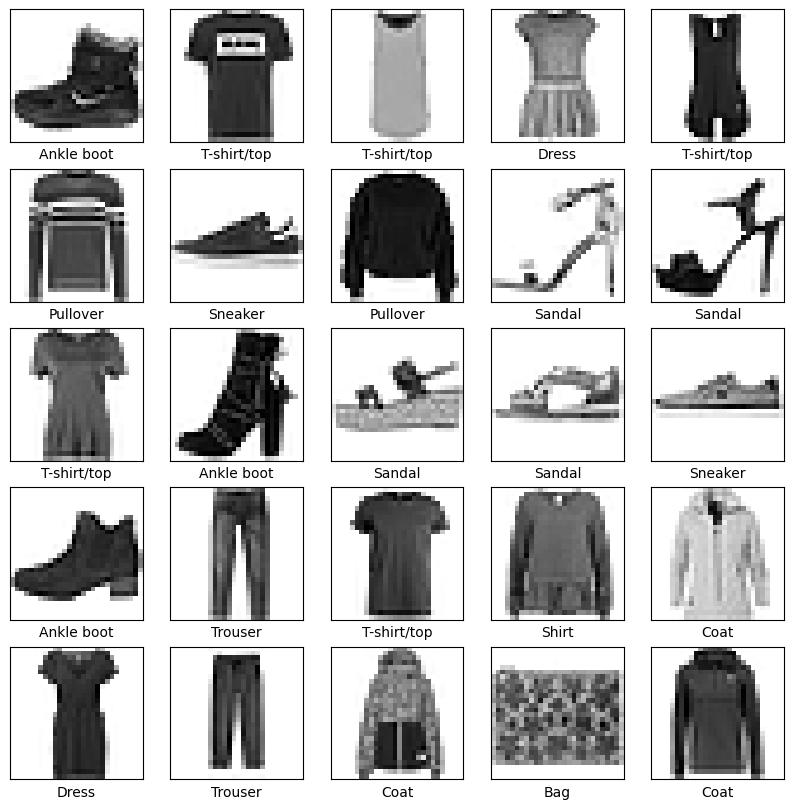

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Keras model 만들기

In [13]:
# Set up the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 입력 데이터의 갯수  : 28*28
    tf.keras.layers.Dense(128, activation='relu'),  # 128개 뉴런으로 압축, 함수는 Relu 사용
    tf.keras.layers.Dense(10)                       # 10개 출력 뉴런
])

## 학습 알고리즘 설정하기

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 학습 실행하기

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4972 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3741 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3371 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3124 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2946 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2820 - accuracy: 0.8936
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2684 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2575 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2479 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.240

## 정확도 계산

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest Images accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3474 - accuracy: 0.8789

Test Images accuracy: 0.8788999915122986


In [17]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


## 제일 큰 값 찾기

In [18]:
print(predictions[1])

[ -0.949334 -15.502054  12.319776 -14.467804   5.842677 -18.60618
   2.209469 -24.762491 -16.133516 -26.690872]


In [19]:
test_labels[1]

2

## 확률 함수로 표시하기

In [20]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [22]:
predictions.shape

(10000, 10)

In [23]:
print(predictions[1])

[1.72430055e-06 8.24985913e-13 9.98421907e-01 2.32068683e-12
 1.53584010e-03 3.70119313e-14 4.05941719e-05 7.84675043e-17
 4.38738808e-13 1.14078935e-17]


In [24]:
np.argmax(predictions[1])

2

In [ ]:
test_labels[1]

2

## 새로운 이미지 데이터 생성하여 결과 예측하기

In [25]:
img = test_images[2]
print(img.shape)

(28, 28)


In [26]:
# 오류 발생
predictions_single = probability_model.predict(img)

print(predictions_single)

InvalidArgumentError: ignored

## 오류 수정하기

In [27]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


## 예측하기

In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[1.9326771e-09 9.9999988e-01 2.0387398e-11 7.2764259e-08 5.7163038e-11
  5.1674383e-20 4.5728265e-12 1.9922031e-19 1.7967636e-15 1.1476328e-18]]


In [29]:
np.argmax(predictions_single[0])

1

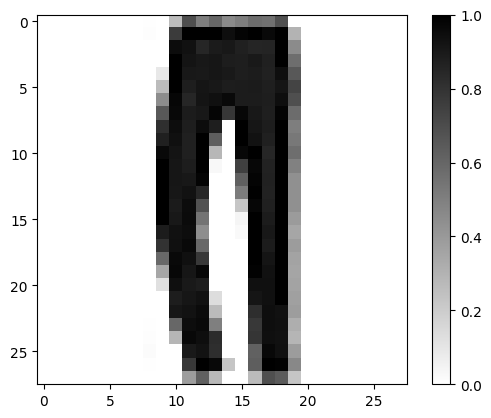

In [30]:
plt.figure()
plt.imshow(img[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## 인터넷에서 검색한 패션 이미지 파일을 예측하기


1.   적절한 이미지 파일을 검색
2.   numpy array 데이터로 변경 => (1,28,28) 형식
3.   probability_model.predict 을 사용하여 예측
4.   결과를 확인







## sample_data 폴더에 이미지 불려오기

In [32]:
from PIL import Image

img = Image.open("./sample_data/bootss.png")
img.size


(28, 28)

In [33]:
img.format

'PNG'

## Numpy Array 데이터로 변환하기

In [34]:
npData = np.array(img)
npData.shape

(28, 28, 4)

## Color image를 Gray image로 변환하기

In [35]:
grayImage = img.convert("L")
grayImage

In [36]:
npGrayData = np.array(grayImage)
npGrayData.shape

(28, 28)

## Keras 데이터 입력 형식으로 수정하기

In [37]:
imgKeras = (np.expand_dims(npGrayData,axis = 0))
print(imgKeras.shape)
#print(imgKeras)

(1, 28, 28)


## Keras model 함수로 변경하기

In [38]:
# TensorFlow and tf.keras 불러오기
import tensorflow as tf

# Set up the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 입력 데이터의 갯수  : 28*28
    tf.keras.layers.Dense(128, activation='relu'),  # 128개 뉴런으로 압축, 함수는 Relu 사용
    tf.keras.layers.Dense(10)                       # 10개 출력 뉴런
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#  Fashion MNIST dataset 불러우기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

#
predictions_single = probability_model.predict(imgKeras)


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 2.6943 - accuracy: 0.6732
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7010 - accuracy: 0.7233
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5877 - accuracy: 0.7882
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5416 - accuracy: 0.8120
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5239 - accuracy: 0.8189
313/313 - 1s - loss: 0.5561 - accuracy: 0.8259 - 580ms/epoch - 2ms/step
1/1 [==============================] - 0s 52ms/step


In [39]:
print(predictions_single)

[[9.3302639e-05 7.4724005e-11 1.1937083e-06 4.9022942e-06 3.5107896e-06
  1.5587053e-03 5.9098991e-05 2.3548960e-06 9.9827623e-01 6.5929248e-07]]


In [40]:
my_class =np.argmax(predictions_single)

In [41]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names[my_class]

'Bag'

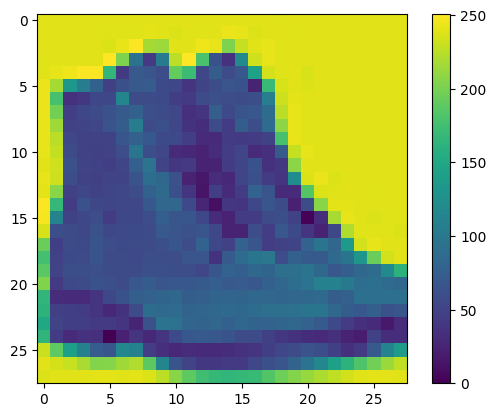

In [42]:
plt.figure()
plt.imshow(npGrayData)
plt.colorbar()
plt.grid(False)
plt.show()